<a href="https://colab.research.google.com/github/nickgithubaccaunt/image_processing/blob/main/%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%962_%D0%A1%D0%B6%D0%B0%D1%82%D0%B8%D0%B5_%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B9%2C_%D0%B8%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D1%83%D1%8F_%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D0%BE%D0%BC_%D0%9A_%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D0%B8%D1%85_(%D0%A0%D0%B5%D0%B6%D0%B8%D0%BC_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D1%8F_%D0%91%D0%B5%D0%B7_%D1%83%D1%87%D0%B8%D1%82%D0%B5%D0%BB%D1%8F)_%D0%A0%D0%BE%D0%B3%D0%B0%D0%BD%D0%BE%D0%B2_%D0%9D_%D0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.	Сжать исходное изображение используя метод K-means, встроенный в библиотеку Scikit-learn при следующих вариантах количества цветов: 2, 3, 4, 8, 16, 32, 64, 128, 256. Сохранить получившиеся изображения в отдельную папку (Scikit Compressor) и продемонстрировать их в отчёте.**

In [17]:
import cv2
import numpy as np
import os
import time
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from PIL import Image

Сохранено: /content/Scikit_Compressor/compressed_2_colors.jpg
Время сжатия для 2 цветов: 0.03 секунд


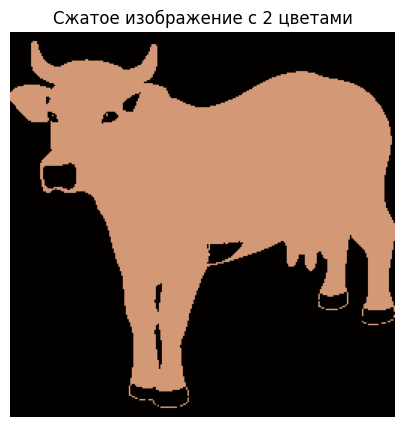

Сохранено: /content/Scikit_Compressor/compressed_3_colors.jpg
Время сжатия для 3 цветов: 0.04 секунд


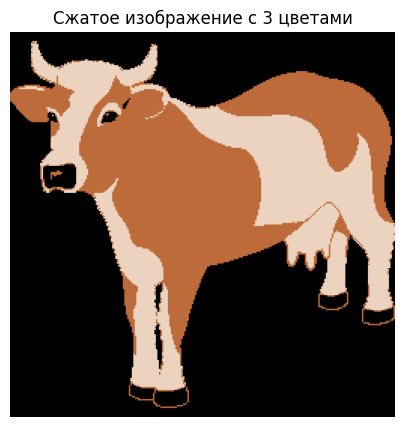

Сохранено: /content/Scikit_Compressor/compressed_4_colors.jpg
Время сжатия для 4 цветов: 0.06 секунд


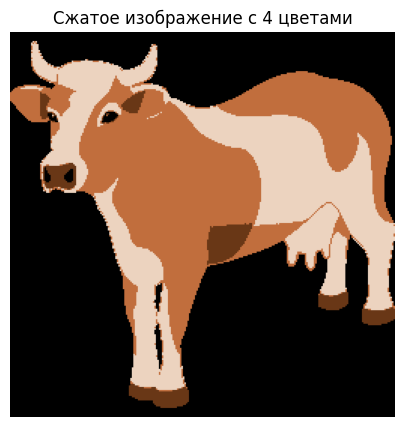

Сохранено: /content/Scikit_Compressor/compressed_8_colors.jpg
Время сжатия для 8 цветов: 0.08 секунд


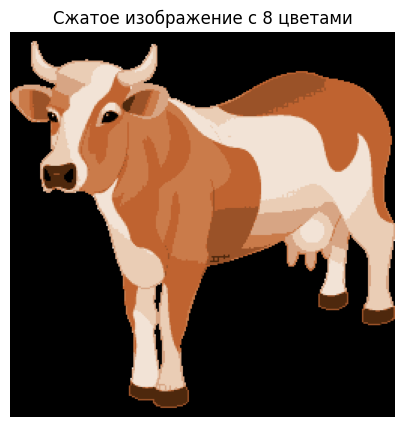

Сохранено: /content/Scikit_Compressor/compressed_16_colors.jpg
Время сжатия для 16 цветов: 0.13 секунд


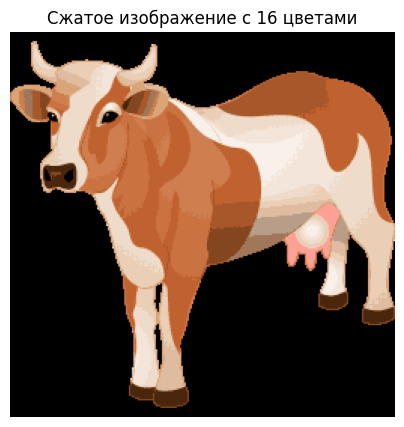

Сохранено: /content/Scikit_Compressor/compressed_32_colors.jpg
Время сжатия для 32 цветов: 0.24 секунд


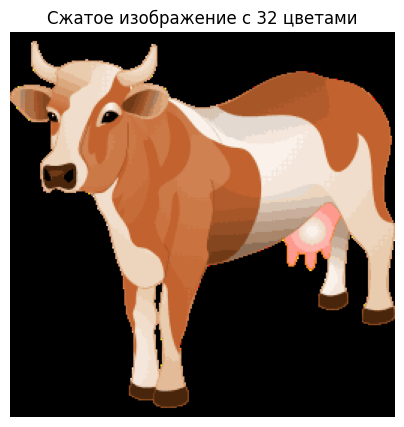

Сохранено: /content/Scikit_Compressor/compressed_64_colors.jpg
Время сжатия для 64 цветов: 0.44 секунд


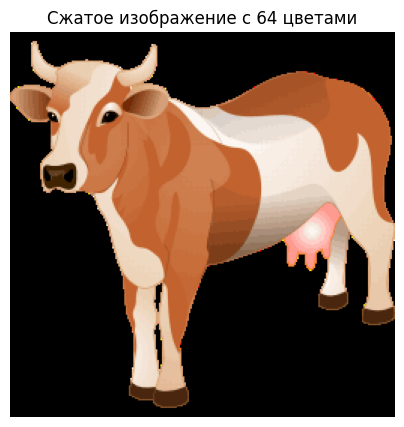

Сохранено: /content/Scikit_Compressor/compressed_128_colors.jpg
Время сжатия для 128 цветов: 0.70 секунд


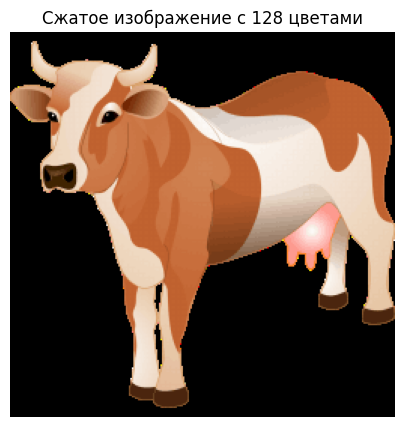

Сохранено: /content/Scikit_Compressor/compressed_256_colors.jpg
Время сжатия для 256 цветов: 1.49 секунд


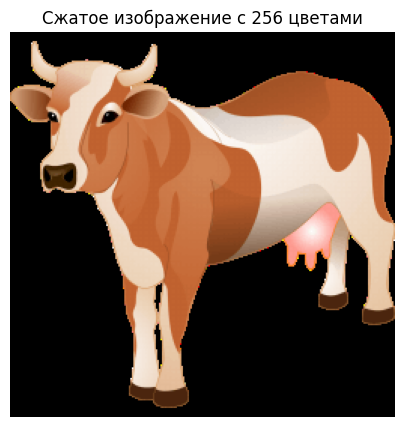

In [18]:
color_counts = [2, 3, 4, 8, 16, 32, 64, 128, 256]
output_folder = '/content/Scikit_Compressor'
os.makedirs(output_folder, exist_ok=True)

image_path = '/content/sample_data/ikonka-korova.png'
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, w, _ = img.shape

img_r = (img / 255.0).reshape(-1, 3)

for k in color_counts:
    start_time = time.time()

    kmeans = KMeans(n_clusters=k, random_state=0).fit(img_r)

    compressed_img = kmeans.cluster_centers_[kmeans.labels_]
    compressed_img = (compressed_img * 255).astype(np.uint8).reshape(h, w, 3)

    output_path = os.path.join(output_folder, f'compressed_{k}_colors.jpg')
    compressed_pil_img = Image.fromarray(compressed_img)
    compressed_pil_img.save(output_path, format='JPEG')

    end_time = time.time()
    compression_time = end_time - start_time
    print(f"Сохранено: {output_path}")
    print(f"Время сжатия для {k} цветов: {compression_time:.2f} секунд")

    plt.figure(figsize=(5, 5))
    plt.imshow(compressed_img)
    plt.title(f'Сжатое изображение с {k} цветами')
    plt.axis('off')
    plt.show()

**2.	Используя алгоритм, дающий возможность вручную выбрать количество итераций, подобрать оптимальное количество итераций по скорости выполнения и качеству сжатого изображения. После этого также следует произвести сжатие изображения с указанными выше количествами цветов. Сохранить получившиеся изображения в отдельную папку (K-means Compressor) и продемонстрировать их в отчёте.**

In [19]:
image_path = '/content/sample_data/ikonka-korova.png'
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_r = (img / 255.0).reshape(-1, 3)

output_folder = '/content/K-means_Compressor_test'
os.makedirs(output_folder, exist_ok=True)

def compress_image_with_kmeans(image_data, k, max_iter):
    kmeans = KMeans(n_clusters=k, max_iter=max_iter, random_state=0)
    start_time = time.time()
    kmeans.fit(image_data)
    elapsed_time = time.time() - start_time
    compressed_img = kmeans.cluster_centers_[kmeans.labels_]
    return (compressed_img.reshape(img.shape) * 255).astype(np.uint8), elapsed_time

for max_iter in [5, 10, 20, 50]:
    print(f"\nКоличество итераций: {max_iter}")
    for k in [2, 3, 4, 8, 16, 32, 64, 128, 256]:
        compressed_img, elapsed_time = compress_image_with_kmeans(img_r, k, max_iter)

        output_path = os.path.join(output_folder, f'compressed_k{k}_iter{max_iter}.jpg')
        compressed_img_bgr = cv2.cvtColor(compressed_img, cv2.COLOR_RGB2BGR)
        cv2.imwrite(output_path, compressed_img_bgr)

        print(f"Изображение с {k} цветами, итераций: {max_iter}, время выполнения: {elapsed_time:.2f} секунд, сохранено в {output_path}")

print("Процесс сжатия завершен.")


Количество итераций: 5
Изображение с 2 цветами, итераций: 5, время выполнения: 0.03 секунд, сохранено в /content/K-means_Compressor_test/compressed_k2_iter5.jpg
Изображение с 3 цветами, итераций: 5, время выполнения: 0.04 секунд, сохранено в /content/K-means_Compressor_test/compressed_k3_iter5.jpg
Изображение с 4 цветами, итераций: 5, время выполнения: 0.04 секунд, сохранено в /content/K-means_Compressor_test/compressed_k4_iter5.jpg
Изображение с 8 цветами, итераций: 5, время выполнения: 0.06 секунд, сохранено в /content/K-means_Compressor_test/compressed_k8_iter5.jpg
Изображение с 16 цветами, итераций: 5, время выполнения: 0.09 секунд, сохранено в /content/K-means_Compressor_test/compressed_k16_iter5.jpg
Изображение с 32 цветами, итераций: 5, время выполнения: 0.15 секунд, сохранено в /content/K-means_Compressor_test/compressed_k32_iter5.jpg
Изображение с 64 цветами, итераций: 5, время выполнения: 0.29 секунд, сохранено в /content/K-means_Compressor_test/compressed_k64_iter5.jpg
Изоб


Количество итераций: 50
Изображение с 2 цветами, итераций: 50, время выполнения: 0.03 секунд, сохранено в /content/K-means Compressor/compressed_k2_iter50.jpg


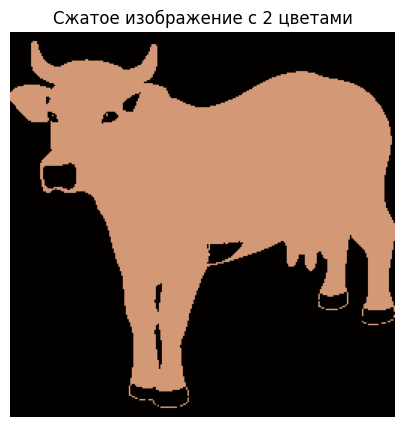

Изображение с 3 цветами, итераций: 50, время выполнения: 0.03 секунд, сохранено в /content/K-means Compressor/compressed_k3_iter50.jpg


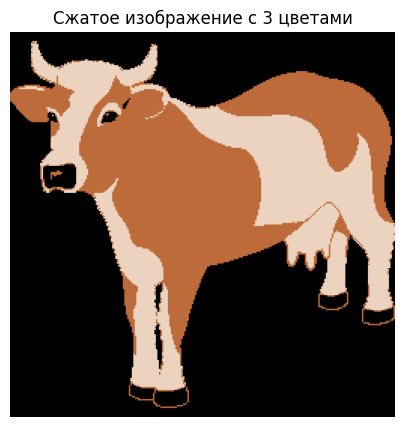

Изображение с 4 цветами, итераций: 50, время выполнения: 0.06 секунд, сохранено в /content/K-means Compressor/compressed_k4_iter50.jpg


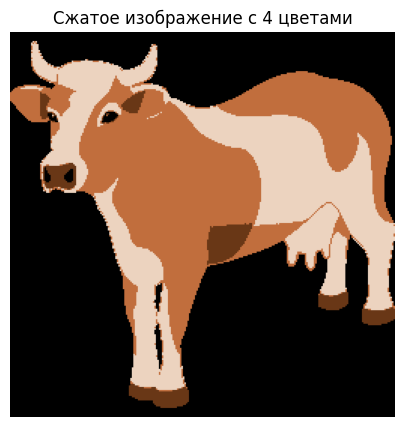

Изображение с 8 цветами, итераций: 50, время выполнения: 0.08 секунд, сохранено в /content/K-means Compressor/compressed_k8_iter50.jpg


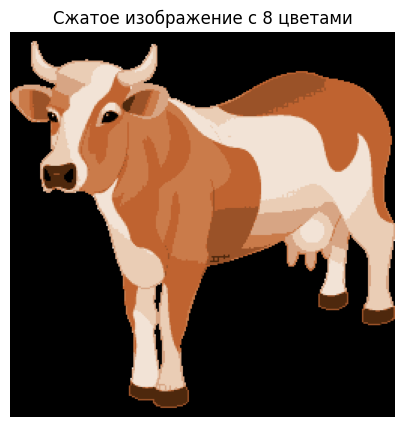

Изображение с 16 цветами, итераций: 50, время выполнения: 0.12 секунд, сохранено в /content/K-means Compressor/compressed_k16_iter50.jpg


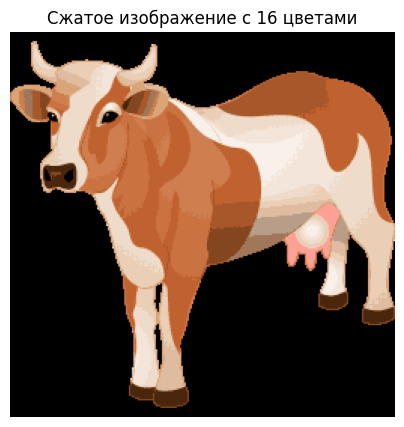

Изображение с 32 цветами, итераций: 50, время выполнения: 0.27 секунд, сохранено в /content/K-means Compressor/compressed_k32_iter50.jpg


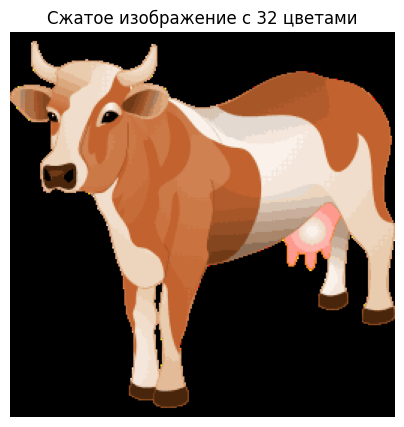

Изображение с 64 цветами, итераций: 50, время выполнения: 0.42 секунд, сохранено в /content/K-means Compressor/compressed_k64_iter50.jpg


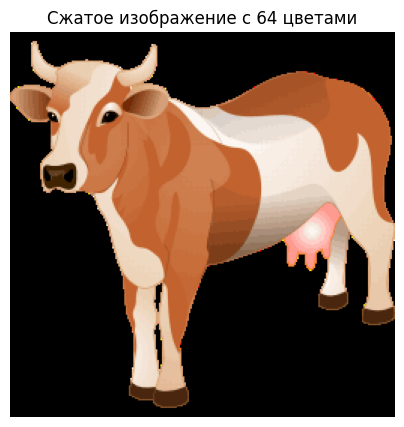

Изображение с 128 цветами, итераций: 50, время выполнения: 0.67 секунд, сохранено в /content/K-means Compressor/compressed_k128_iter50.jpg


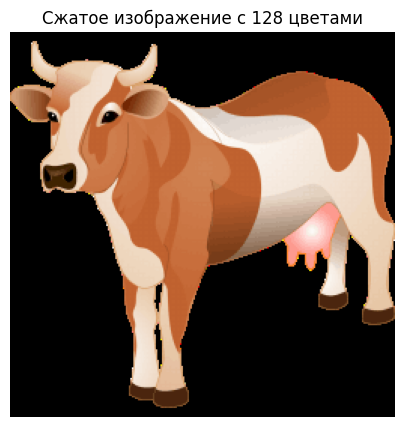

Изображение с 256 цветами, итераций: 50, время выполнения: 1.42 секунд, сохранено в /content/K-means Compressor/compressed_k256_iter50.jpg


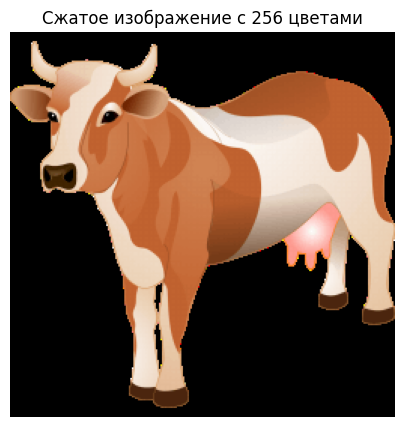

Процесс сжатия завершен.


In [21]:
image_path = '/content/sample_data/ikonka-korova.png'
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_r = (img / 255.0).reshape(-1, 3)

output_folder = '/content/K-means Compressor'
os.makedirs(output_folder, exist_ok=True)

def compress_image_with_kmeans(image_data, k, max_iter):
    kmeans = KMeans(n_clusters=k, max_iter=max_iter, random_state=0)
    start_time = time.time()
    kmeans.fit(image_data)
    elapsed_time = time.time() - start_time
    compressed_img = kmeans.cluster_centers_[kmeans.labels_]
    return (compressed_img.reshape(img.shape) * 255).astype(np.uint8), elapsed_time

for max_iter in [50]:
    print(f"\nКоличество итераций: {max_iter}")
    for k in [2, 3, 4, 8, 16, 32, 64, 128, 256]:
        compressed_img, elapsed_time = compress_image_with_kmeans(img_r, k, max_iter)

        output_path = os.path.join(output_folder, f'compressed_k{k}_iter{max_iter}.jpg')

        compressed_pil_img = Image.fromarray(compressed_img)
        compressed_pil_img.save(output_path, format='JPEG')

        print(f"Изображение с {k} цветами, итераций: {max_iter}, время выполнения: {elapsed_time:.2f} секунд, сохранено в {output_path}")

        plt.figure(figsize=(5, 5))
        plt.imshow(compressed_img)
        plt.title(f'Сжатое изображение с {k} цветами')
        plt.axis('off')
        plt.show()

print("Процесс сжатия завершен.")

**3.	Составить сравнительную таблицу со следующими данными: количество цветов, вес сжатого изображения по алгоритму из п.1, время выполнения программы для сжатия изображения по алгоритму из п.1, вес сжатого изображения по алгоритму из п.2., время выполнения программы для сжатия изображения по алгоритму из п.2**

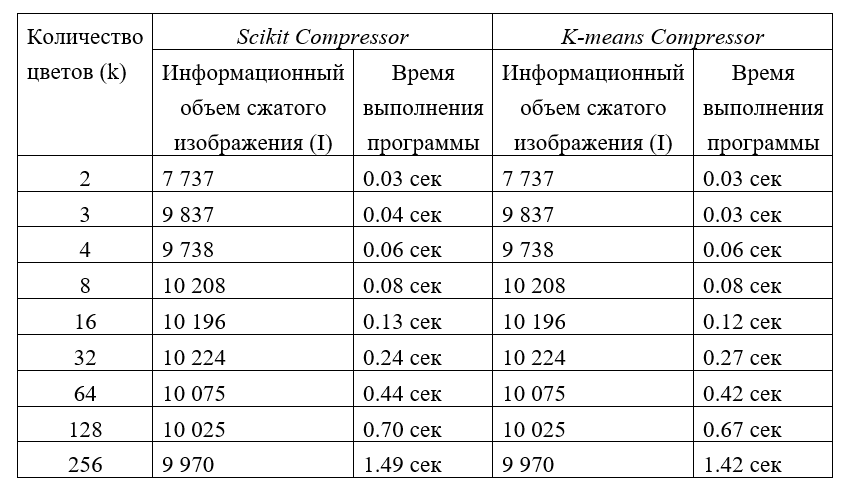